# Gridsearch to Optimize Model Hyperparameters

This is one of two notebooks in which I run different models through a gridsearch to optimize hyperparameters for recall score. 

In [1]:
import pandas as pd
import reddit_functions as rf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

### Import train and test sets

In [2]:
# import data
X_train = pd.read_csv('../data/train_test_sets/X_train.csv')
X_train = X_train['selftext'] # convert from dataframe to series

X_test = pd.read_csv('../data/train_test_sets/X_test.csv')
X_test = X_test['selftext'] # convert from dataframe to series

y_train = pd.read_csv('../data/train_test_sets/y_train.csv')
y_train = y_train['subreddit'] # convert from dataframe to series

y_test = pd.read_csv('../data/train_test_sets/y_test.csv')
y_test = y_test['subreddit'] # convert from dataframe to series 

### Multinomial Naive Bayes

0.9875703735282686


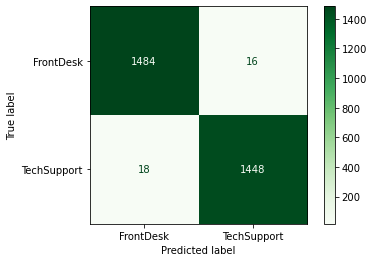

In [3]:
pipe_mnb = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

params_mnb = {
    'cvec__max_features': [None, 2500, 3000, 3500],
    'cvec__max_df': [.8, .7, 1.0],
    'cvec__stop_words':['english', None],
    'mnb__alpha': [0.001, 0.1, 1.0]
}

gs_mnb = GridSearchCV(pipe_mnb, params_mnb)
gs_mnb.fit(X_train, y_train)
print(gs_mnb.best_score_)


plot_confusion_matrix(gs_mnb, X_test, y_test, display_labels=['FrontDesk', 'TechSupport'], cmap='Greens');

In [4]:
gs_mnb.best_params_

{'cvec__max_df': 0.8,
 'cvec__max_features': 3500,
 'cvec__stop_words': 'english',
 'mnb__alpha': 0.001}

In [5]:
gs_mnb.score(X_test, y_test)

0.9885367498314228

In [18]:
gs_mnb.score(X_train, y_train)

0.9893048128342246

In [6]:
preds_mnb = gs_mnb.predict(X_test)

In [7]:
predictions = pd.read_csv('../data/predictions/predictions_all_data.csv')
predictions

,X_test,y_true,y_logreg_cvec,y_logreg_tvec,y_svm_cvec,y_svm_tvec
0,Once upon a time it was a normal day at the ai...,0,0,0,0,0
1,I once worked as a programmer for a company th...,1,1,1,1,1
2,To set the scene: I'm genderqueer. Born with b...,0,0,0,0,0
3,"So, it won't let me edit the previous post, so...",0,0,0,0,0
4,"At $Hospital, we used $WellKnownBrand printers...",1,1,1,1,1
...,...,...,...,...,...,...
2961,My hotel is finally starting to return to some...,0,0,0,0,0
2962,Short back ground story:\n\nI was working at a...,1,1,1,1,1
2963,I work for a medium sized ASC (Ambulatory Surg...,1,1,1,1,1
2964,"At my hotel, we have a lot of corporate guests...",0,0,0,0,0


In [8]:
predictions['y_mnb'] = preds_mnb
predictions.head()

,X_test,y_true,y_logreg_cvec,y_logreg_tvec,y_svm_cvec,y_svm_tvec,y_mnb
0,Once upon a time it was a normal day at the ai...,0,0,0,0,0,0
1,I once worked as a programmer for a company th...,1,1,1,1,1,1
2,To set the scene: I'm genderqueer. Born with b...,0,0,0,0,0,0
3,"So, it won't let me edit the previous post, so...",0,0,0,0,0,0
4,"At $Hospital, we used $WellKnownBrand printers...",1,1,1,1,1,1


In [9]:
predictions.to_csv('../data/predictions/predictions_all_data.csv', index=False)

### voting classifier

In [10]:
vote = VotingClassifier([
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier())), #specify base estimator 
                                                    # if you want to tune over those parameters
    ('gbc', GradientBoostingClassifier()),
    ('logreg', LogisticRegression(solver='saga', max_iter=2000))
])

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('model', vote)
])

In [11]:
params = {
    'cvec__max_features': [None, 2500, 3000],
    'cvec__max_df': [.7, 1.0],
    'cvec__stop_words': ['english', None],
    'model__ada__base_estimator__max_depth': [3, 4,],
    'model__ada__base_estimator__min_samples_split': [2, 5,],
    'model__gbc__n_estimators':[100, 150]
}

gs_vc = GridSearchCV(pipe, params, cv=5)

gs_vc.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

NameError: name 'gs' is not defined

In [12]:
print(gs_vc.best_score_)
gs_vc.best_params_

0.9867032170158698


{'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__stop_words': None,
 'model__ada__base_estimator__max_depth': 3,
 'model__ada__base_estimator__min_samples_split': 5,
 'model__gbc__n_estimators': 100}

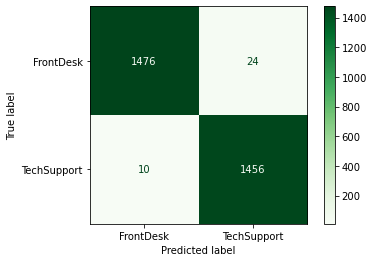

In [13]:
plot_confusion_matrix(gs_vc, X_test, y_test, display_labels=['FrontDesk', 'TechSupport'], cmap='Greens');

In [19]:
gs_vc.score(X_test, y_test), gs_vc.score(X_train, y_train)

(0.9885367498314228, 0.9988437635496459)

In [14]:
preds_vc = gs_vc.predict(X_test)

In [15]:
predictions = pd.read_csv('../data/predictions/predictions_all_data.csv')
predictions.head()

,X_test,y_true,y_logreg_cvec,y_logreg_tvec,y_svm_cvec,y_svm_tvec,y_mnb
0,Once upon a time it was a normal day at the ai...,0,0,0,0,0,0
1,I once worked as a programmer for a company th...,1,1,1,1,1,1
2,To set the scene: I'm genderqueer. Born with b...,0,0,0,0,0,0
3,"So, it won't let me edit the previous post, so...",0,0,0,0,0,0
4,"At $Hospital, we used $WellKnownBrand printers...",1,1,1,1,1,1


In [16]:
predictions['y_vc'] = preds_vc
predictions.head()

,X_test,y_true,y_logreg_cvec,y_logreg_tvec,y_svm_cvec,y_svm_tvec,y_mnb,y_vc
0,Once upon a time it was a normal day at the ai...,0,0,0,0,0,0,0
1,I once worked as a programmer for a company th...,1,1,1,1,1,1,1
2,To set the scene: I'm genderqueer. Born with b...,0,0,0,0,0,0,0
3,"So, it won't let me edit the previous post, so...",0,0,0,0,0,0,0
4,"At $Hospital, we used $WellKnownBrand printers...",1,1,1,1,1,1,1


In [17]:
predictions.to_csv('../data/predictions/predictions_all_data.csv', index=False)